## 6. Analyzing time series data

### 1. Importing libraries

### 2. Importing data

### 3. Data cleaning

### 4. Decomposition

### 5. Dickey-Fuller test for stationarity

### 6. Differencing to stationarize data

### 7. Checking for autocorrelations

#### 1. Importing libraries

In [6]:
# Importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

#### 2. Importing data

In [8]:
path = r'C:\Users\Priya\OneDrive\Documents\CareerFoundry\Data Immersion\Achievement 6\Greenhouse Gas Emissions Analysis'

In [9]:
path

'C:\\Users\\Priya\\OneDrive\\Documents\\CareerFoundry\\Data Immersion\\Achievement 6\\Greenhouse Gas Emissions Analysis'

In [10]:
# Importing the greenhouse gas emissions dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'emissions-cleaned.csv'), index_col = False)

Contains public sector information licensed under the Open Government Licence v3.0. License: https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/

#### 3. Data cleaning

In [13]:
# Checking the shape of the dataframe
df.shape

(533016, 16)

In [14]:
# Viewing the first five rows of the dataframe
df.head()

,Unnamed: 0,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [15]:
# Dropping the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace = True)

In [16]:
# Checking the shape of the dataframe
df.shape

(533016, 15)

In [17]:
# Checking if the Unnamed: 0 column was removed
df.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [18]:
# Creating a subset with only Calendar Year and Territorial emissions (kt CO2e) columns
df_sub = df[['Calendar Year', 'Territorial emissions (kt CO2e)']]

In [19]:
# Viewing the first five rows of df_sub
df_sub.head()

,Calendar Year,Territorial emissions (kt CO2e)
0,2005,1.678178
1,2005,0.052700
2,2005,0.006770
3,2005,0.311375
4,2005,0.010500


In [20]:
# Grouping emissions by Calendar Year
df_sub = df_sub.groupby('Calendar Year')['Territorial emissions (kt CO2e)'].sum().reset_index()

In [21]:
# Viewing df_sub
df_sub

,Calendar Year,Territorial emissions (kt CO2e)
0,2005,656037.507441
1,2006,648793.169593
2,2007,634140.214106
3,2008,613358.356753
4,2009,557708.437966
5,2010,570423.432600
6,2011,525197.321435
7,2012,543585.676016
8,2013,530616.846029
9,2014,490885.394905


In [35]:
# Setting the Calendar Year column as the index
from datetime import datetime
df_sub['datetime'] = pd.to_datetime(df_sub['Calendar Year'], format='%Y')
df_sub = df_sub.set_index('datetime')
df_sub.drop(['Calendar Year'], axis=1, inplace=True)
df_sub.head()

,Territorial emissions (kt CO2e)
datetime,
2005-01-01,656037.507441
2006-01-01,648793.169593
2007-01-01,634140.214106
2008-01-01,613358.356753
2009-01-01,557708.437966


In [37]:
# Viewing df_sub
df_sub

,Territorial emissions (kt CO2e)
datetime,
2005-01-01,656037.507441
2006-01-01,648793.169593
2007-01-01,634140.214106
2008-01-01,613358.356753
2009-01-01,557708.437966
2010-01-01,570423.432600
2011-01-01,525197.321435
2012-01-01,543585.676016
2013-01-01,530616.846029


I created a subset of the original dataframe to included only the Calendar Year and Territorial emissions (kt CO2e) columns. I did not exclude any data points or any years/dates from the Calendar Year column.

In [40]:
# Checking for missing values
df_sub.isnull().sum() 

Territorial emissions (kt CO2e)    0
dtype: int64

In [42]:
# Checking for mixed-type data
for col in df_sub.columns.tolist():
  weird = (df_sub[[col]].applymap(type) != df_sub[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_sub[weird]) > 0:
    print (col)

In [44]:
# Creating the df_dups subset to check for duplicates
df_dups = df_sub[df_sub.duplicated()]

In [46]:
# Viewing df_dups
df_dups

,Territorial emissions (kt CO2e)
datetime,


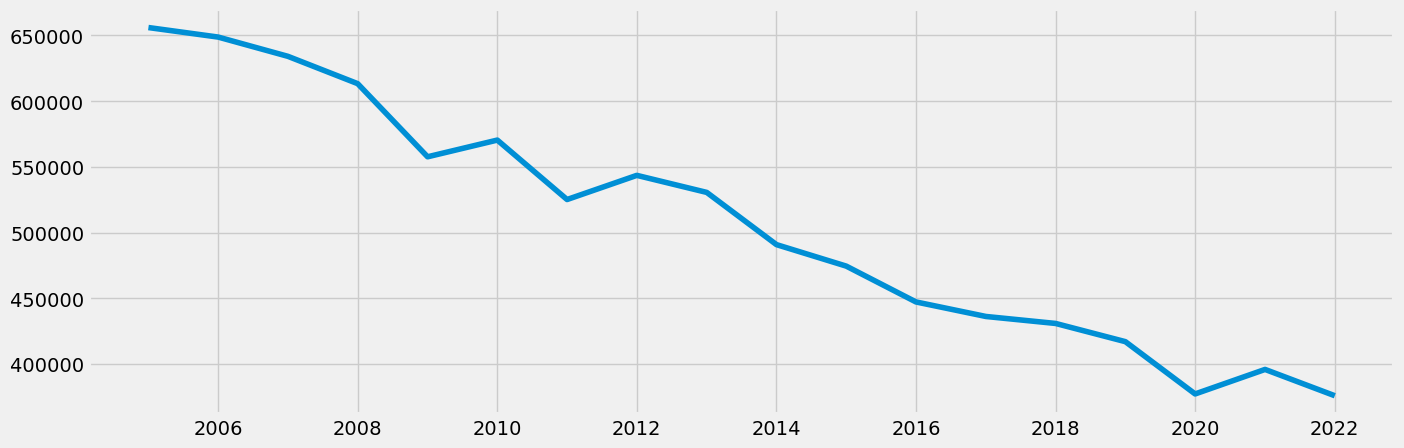

In [48]:
# Creating a line chart of the data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

#### 4. Decomposition

In [53]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [55]:
# Setting a fixed size for the chart
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

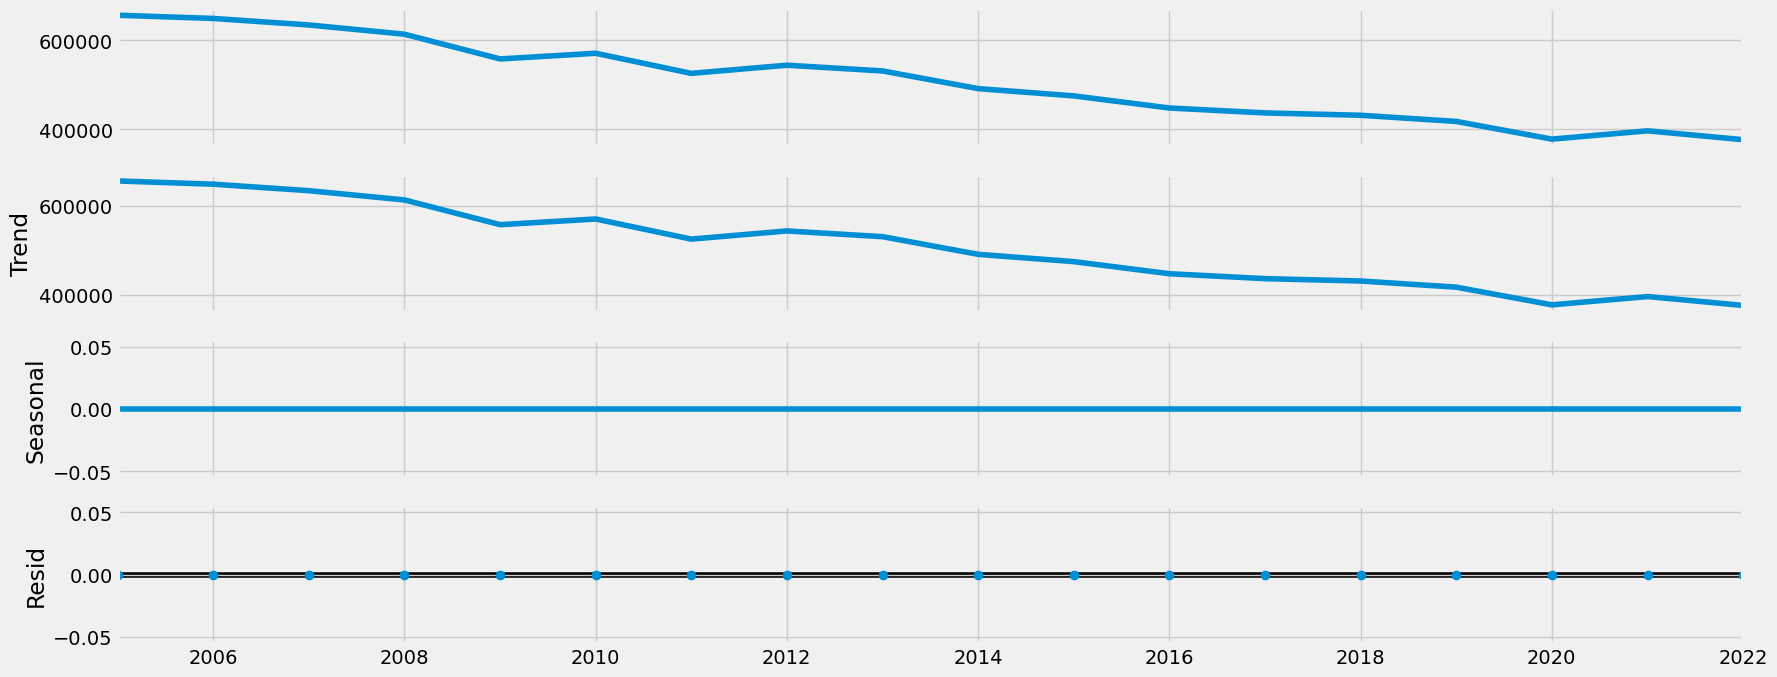

In [57]:
# Plotting the separate time series components on a chart
decomposition.plot()
plt.show()

Results of the decomposition:
- The level (first chart) and the trend are the same, which means that the data does not have much noise.
- The trend is a linear drop overtime with three slight increases, once in 2010, once in 2012, and once in 2021. Overall, the trend is dominant as it decreases from 2005 (the beginning) to 2022 (the end).
- The seasonality is completely flat, meaning that there is no seasonality in the data. One reason for this is that the data is collected yearly, so it is very difficult to see how the territorial emissions change throughout the year, which would be easier to see if the data was collected weekly or monthly.
- The residual is completely flat, meaning that there is no unexplained noise in the data.

#### 5. Dickey-Fuller test for stationarity

Defining the alternative and null hypotheses:
- Alternative hypothesis: A unit root is not present in the data.
- Null hypothesis: A unit root is present in the data.

In [65]:
# Importing the adfuller function and running the Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
dickey_fuller(df_sub['Territorial emissions (kt CO2e)'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.808208
p-value                         0.816699
Number of Lags Used             0.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


Results of Dickey-Fuller test:
- The test statistic of -0.808208 is larger than the critical value (5%) of -3.054358, using a significance level of 5%, which means that the null hypothesis cannot be rejected.
- The test statistic being larger than the critical value (5%) means that a unit root is present in the data and the data is non-stationary.

#### 6. Differencing to stationarize data

In [70]:
# Creating the df_diff dataframe
df_diff = df_sub - df_sub.shift(1)

In [72]:
# Removing the missing values that resulted from differencing
df_diff.dropna(inplace = True)

In [74]:
# Viewing the first five rows of df_diff
df_diff.head()

,Territorial emissions (kt CO2e)
datetime,
2006-01-01,-7244.337847
2007-01-01,-14652.955487
2008-01-01,-20781.857353
2009-01-01,-55649.918787
2010-01-01,12714.994633


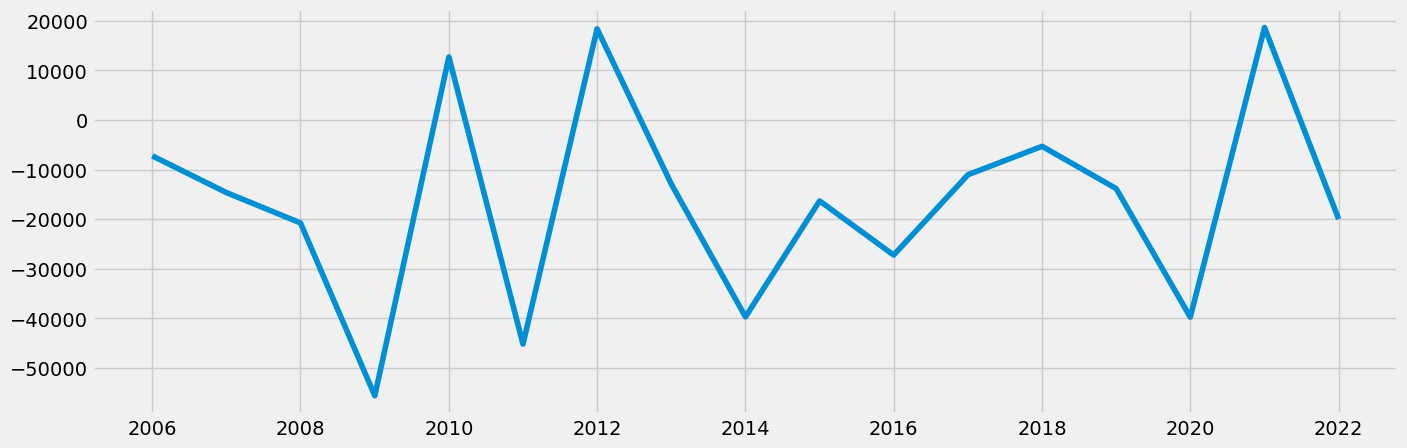

In [76]:
# Plotting the time series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [78]:
# Running the Dickey-Fuller test on df_diff
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.487006
p-value                         0.008327
Number of Lags Used             1.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


Results of the Dickey-Fuller test:
- The test statistic of -3.487006 is smaller than the critical value (5%) of -3.084908, using a significance level of 5%, which means that the null hypothesis can be rejected.
- The test statistic being smaller than the critical value (5%) means that a unit root is not present in the data and the data is stationary.

#### 7. Checking for autocorrelations

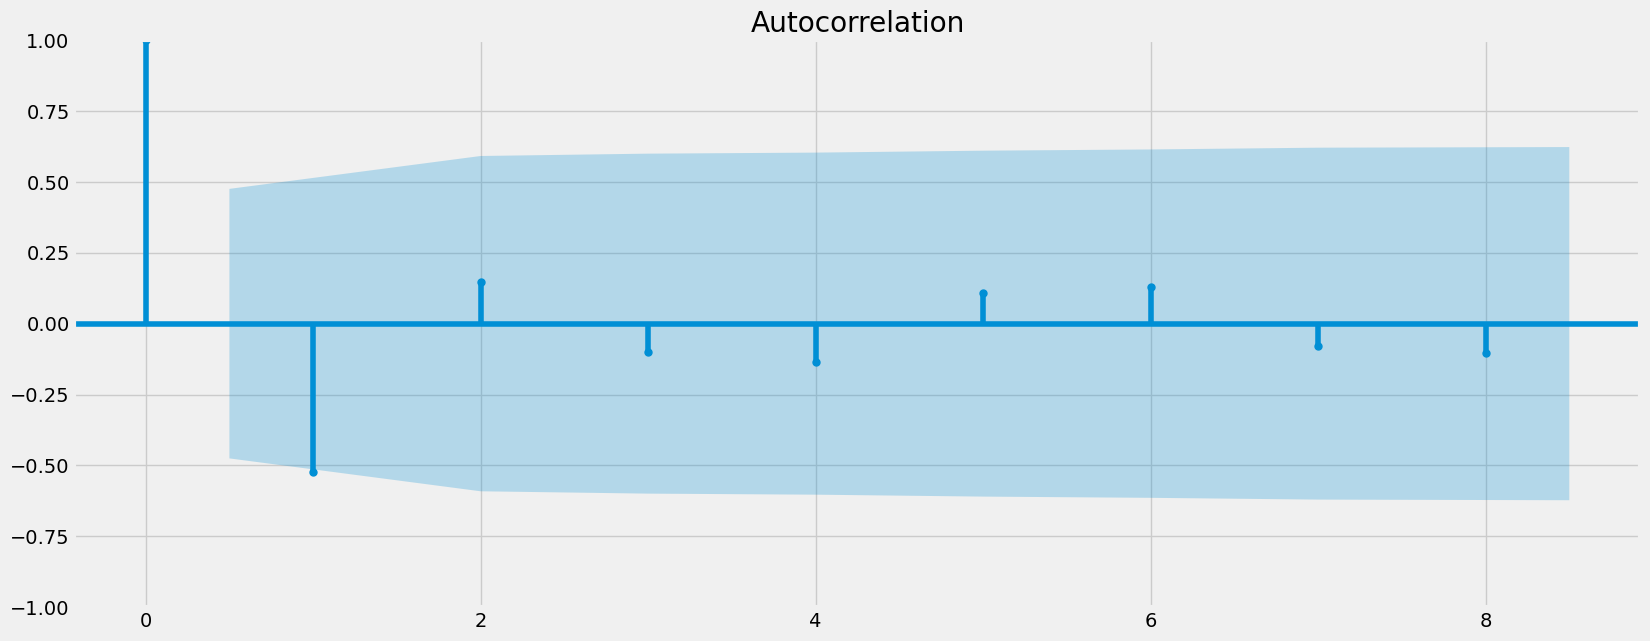

In [86]:
# Creating a plot to check for autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_diff)
plt.show()

Since there are only two lags that are above the confidence interval, it can be concluded that the data is stationary, and that another round of differencing is not required.